In [ ]:
! pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import autoviz

In [ ]:
od.download("https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitabaishnab
Your Kaggle Key: ··········


100%|██████████| 41.7M/41.7M [00:02<00:00, 20.4MB/s]


In [ ]:
path='/content/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'
dataset=pd.read_csv(path , sep=':::',engine='python',names=['Title','Genre','Description'])

In [ ]:
dataset.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
dataset.shape

(54214, 3)

In [ ]:
dataset.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
dataset.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
dataset=dataset.drop_duplicates(keep='first')

In [ ]:
dataset.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
dataset['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

<Axes: xlabel='count', ylabel='Genre'>

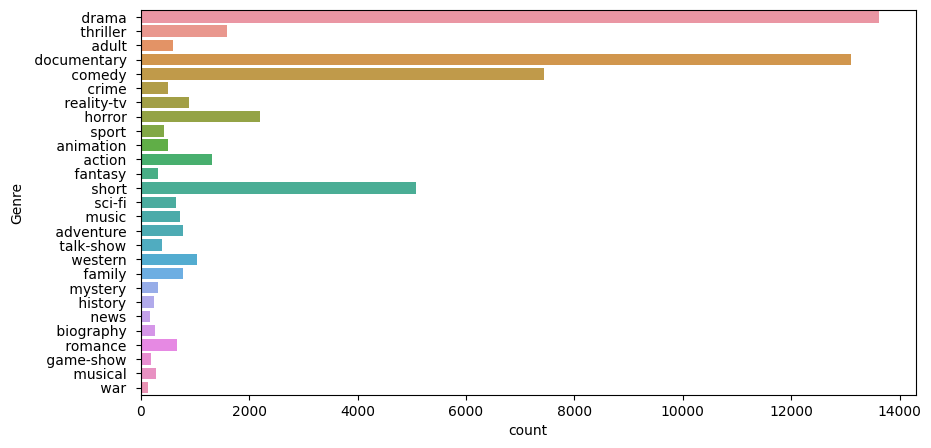

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(dataset,y='Genre')

In [ ]:
x = dataset['Description']
y = dataset['Genre']

In [ ]:
path='/content/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
df_1=pd.read_csv(path , sep=':::',engine='python',names=['Title','Description'])

In [ ]:
df_1.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
path='/content/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt'
df=pd.read_csv(path , sep=':::',engine='python',names=['Title','Genre','Description'])

In [ ]:
df.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
x_test=df['Description']
y_test=df['Genre']

In [ ]:
x.shape,x_test.shape,y.shape,y_test.shape

((54214,), (54200,), (54214,), (54200,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
vect=TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

In [ ]:
x_vect=vect.fit_transform(x)
x_test_vect=vect.transform(x_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(y)
print(le.classes_)
le.fit(y_test)
print(le.classes_)

[' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western ']
[' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western ']


In [ ]:
y = le.transform(y)
y_test=le.transform(y_test)

In [ ]:
x_vect.shape,x_test_vect.shape,y.shape,y_test.shape

((54214, 120800), (54200, 120800), (54214,), (54200,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()

In [ ]:
model = model.fit(x_vect,y)

In [ ]:
predict=model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.72      0.05      0.09      7446
           6       0.00      0.00      0.00       505
           7       0.53      0.90      0.66     13096
           8       0.38      0.88      0.53     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       318
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
probs = model.predict_proba(x_test_vect)
print("ROC-AUC Score:", roc_auc_score(y_test, probs, multi_class="ovr"))

ROC-AUC Score: 0.7422291273297377


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_1 = LogisticRegression(max_iter=1000)

In [ ]:
model_1.fit(x_vect,y)

LogisticRegression(max_iter=1000)

In [ ]:
predict_1=model_1.predict(x_test_vect)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.26      0.35      1314
           1       0.62      0.21      0.31       590
           2       0.69      0.14      0.24       775
           3       0.60      0.02      0.05       498
           4       0.00      0.00      0.00       264
           5       0.55      0.59      0.57      7446
           6       0.42      0.02      0.04       505
           7       0.66      0.87      0.75     13096
           8       0.54      0.80      0.64     13612
           9       0.58      0.08      0.14       783
          10       0.71      0.02      0.03       322
          11       0.93      0.48      0.63       193
          12       0.00      0.00      0.00       243
          13       0.66      0.57      0.61      2204
          14       0.70      0.39      0.50       731
          15       1.00      0.01      0.01       276
          16       1.00      0.00      0.01       318
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
probs_1 = model_1.predict_proba(x_test_vect)
print("ROC-AUC Score:", roc_auc_score(y_test, probs_1, multi_class="ovr"))

ROC-AUC Score: 0.9072200657766287
